In [ ]:
# Importing dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Evaluation-dataset.csv', names = ['Reviews','col_1','col_2', 'col_3','col_4', 'col_5','col_6', 'col_7','col_8', 'col_9','col_10', 'col_11','col_12','col_13','col_14'])
data.sample(5)

,Reviews,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
3268,Easy to choose and best prices. Easy to use we...,value for money positive,tyre quality positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4491,Used [REDACTED] many times now and I always ge...,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5892,Spot on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10040,Very pleased with all aspects of purchase and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3417,Easy to do and saves phoning round garages plu...,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(10132, 15)

# How to approach:
1. Data cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvements depending upon Evaluation.

# 1. Data Cleaning

In [ ]:
# Information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  10132 non-null  object
 1   col_1    8129 non-null   object
 2   col_2    4239 non-null   object
 3   col_3    1538 non-null   object
 4   col_4    445 non-null    object
 5   col_5    128 non-null    object
 6   col_6    36 non-null     object
 7   col_7    13 non-null     object
 8   col_8    8 non-null      object
 9   col_9    4 non-null      object
 10  col_10   1 non-null      object
 11  col_11   1 non-null      object
 12  col_12   1 non-null      object
 13  col_13   1 non-null      object
 14  col_14   1 non-null      object
dtypes: object(15)
memory usage: 1.2+ MB


Since majority of values are null from column 2 to column 14, we are dropping them.

In [ ]:
data.drop(columns = ['col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9','col_10', 'col_11', 'col_12', 'col_13', 'col_14'], axis = 1, inplace = True)

In [ ]:
# Checking the values
data.sample(5)

,Reviews,col_1
1828,Good quality tyres at a competitive price. Pro...,tyre quality positive
6010,"Easy to use, and great choices",NaN
5190,Easy to order. Good prices and great service.,value for money positive
8498,Fast fitting and friendly staff was my second ...,length of fitting positive
4628,Good price expertly fitted. Always get a good ...,value for money positive


We will rename col_1 since it is not very descriptive.

In [ ]:
# Renaming the column.
data.rename(columns = {'col_1':'target'}, inplace = True)

In [ ]:
def categorize_sentiments(text):
  if 'positive' in str(text):
    return 'positive'
  elif 'negative' in str(text):
    return 'negative'

In [ ]:
for i in ['target']:
  data[i] = data[i].apply(categorize_sentiments)

<Axes: xlabel='target', ylabel='count'>

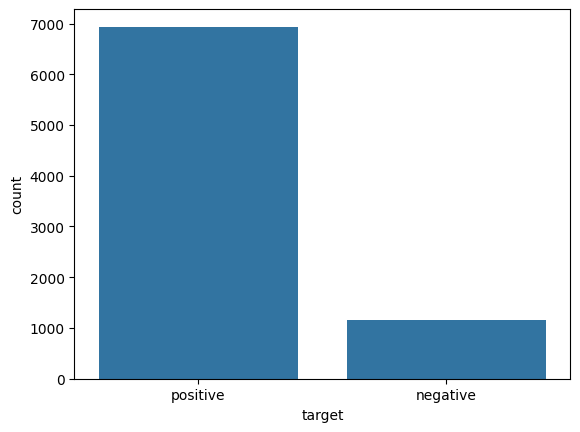

In [ ]:
sns.countplot(data, x = 'target')

In [ ]:
# Using map function to map positive as 1 and negative as 0
sentiment_mapping = {'negative': 0, 'positive': 1}

In [ ]:
# Map values in the 'target' column
data['target'] = data['target'].map(sentiment_mapping)

In [ ]:
data['target']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10127    1.0
10128    1.0
10129    1.0
10130    NaN
10131    NaN
Name: target, Length: 10132, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data['target'] = imputer.fit_transform(data[['target']])

<Axes: xlabel='target', ylabel='count'>

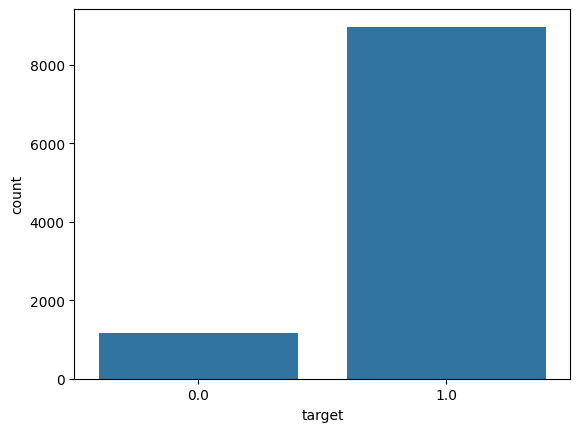

In [ ]:
# checking positive and negative values
sns.countplot(data, x = 'target')

In [ ]:
# Missing values
data.isnull().sum()

Reviews    0
target     0
dtype: int64

In [ ]:
# Check for duplicate values
data.duplicated().sum()

4

In [ ]:
# Removing duplicates
data = data.drop_duplicates(keep = 'first')

In [ ]:
# Checking if we still have any duplicate value
data.duplicated().sum()

0

# 2. EDA

In [ ]:
data['target'].value_counts()

1.0    8966
0.0    1162
Name: target, dtype: int64

This shows that there are many positive sentiments in our dataset while there are less negative reviews.

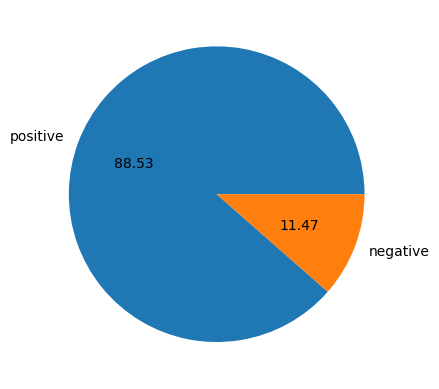

In [ ]:
# Representation using pie chart
plt.pie(data['target'].value_counts(), labels = ['positive','negative'], autopct = '%0.2f')
plt.show()

This graph clearly shows that data is imbalanced.

Now, we'll find how many characters, words and sentences are there in the review column.

In [ ]:
# Importing natural language toolkit library
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['no_of_char_used'] = data['Reviews'].apply(len)

In [ ]:
data.head()

,Reviews,target,no_of_char_used
0,Tires where delivered to the garage of my choi...,1.0,202
1,"Easy Tyre Selection Process, Competitive Prici...",1.0,78
2,Very easy to use and good value for money.,1.0,42
3,Really easy and convenient to arrange,1.0,37
4,It was so easy to select tyre sizes and arrang...,1.0,90


In [ ]:
data['no_of_words'] = data['Reviews'].apply(lambda x : len(nltk.word_tokenize(x))) # All words are broken into list and they are thus counted.

In [ ]:
data.head()

,Reviews,target,no_of_char_used,no_of_words
0,Tires where delivered to the garage of my choi...,1.0,202,42
1,"Easy Tyre Selection Process, Competitive Prici...",1.0,78,11
2,Very easy to use and good value for money.,1.0,42,10
3,Really easy and convenient to arrange,1.0,37,6
4,It was so easy to select tyre sizes and arrang...,1.0,90,17


In [ ]:
data['count_sentences'] = data['Reviews'].apply(lambda x : len(nltk.sent_tokenize(x))) # All sentences are broken into list and they are thus counted.

In [ ]:
data.head()

,Reviews,target,no_of_char_used,no_of_words,count_sentences
0,Tires where delivered to the garage of my choi...,1.0,202,42,2
1,"Easy Tyre Selection Process, Competitive Prici...",1.0,78,11,1
2,Very easy to use and good value for money.,1.0,42,10,1
3,Really easy and convenient to arrange,1.0,37,6,1
4,It was so easy to select tyre sizes and arrang...,1.0,90,17,2


In [ ]:
data[['no_of_char_used','no_of_words','count_sentences']].describe()

,no_of_char_used,no_of_words,count_sentences
count,10128.000000,10128.000000,10128.000000
mean,126.537618,25.409261,1.942141
std,171.167923,35.441337,1.620573
min,1.000000,1.000000,1.000000
25%,43.000000,8.000000,1.000000
50%,77.000000,15.000000,1.000000
75%,147.000000,29.000000,2.000000
max,3553.000000,780.000000,26.000000


We get to know that there is on an average number_of_char used is 126, whereas no_of_words on an average is 25 while on an average we have approx 2 sentences.

In [ ]:
data[data['target']==0][['no_of_char_used','no_of_words','count_sentences']].describe()

,no_of_char_used,no_of_words,count_sentences
count,1162.000000,1162.000000,1162.000000
mean,293.950947,60.485370,3.099828
std,332.569896,69.222695,2.924608
min,9.000000,2.000000,1.000000
25%,101.000000,21.000000,1.000000
50%,200.000000,41.000000,2.000000
75%,367.750000,76.000000,4.000000
max,3553.000000,780.000000,26.000000


Thus for negative word in the sentiment column we have approx 293 characters used, 60 words and 3 sentences on an average.

In [ ]:
data[data['target']==1][['no_of_char_used','no_of_words','count_sentences']].describe()

,no_of_char_used,no_of_words,count_sentences
count,8966.000000,8966.000000,8966.000000
mean,104.840732,20.863373,1.792104
std,121.115510,24.863751,1.289473
min,1.000000,1.000000,1.000000
25%,40.000000,8.000000,1.000000
50%,70.000000,14.000000,1.000000
75%,128.000000,25.000000,2.000000
max,2891.000000,594.000000,17.000000


Thus for positive word in the sentiment column we have approx 104 characters used, 20 words and 2 sentences on an average.

o we can see from above that for a negative word we have more number of characters, words and sentences when compared to positive words.

<Axes: xlabel='no_of_char_used', ylabel='Count'>

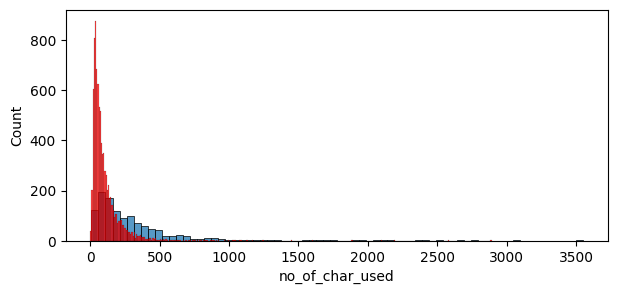

In [ ]:
# Data visualization.
plt.figure(figsize = (7,3))
sns.histplot(data[data['target'] == 0]['no_of_char_used'])
sns.histplot(data[data['target'] == 1]['no_of_char_used'],color = 'red')

It can be seen from here that with target value while negative has more number of characters than with positive values.

<Axes: xlabel='no_of_words', ylabel='Count'>

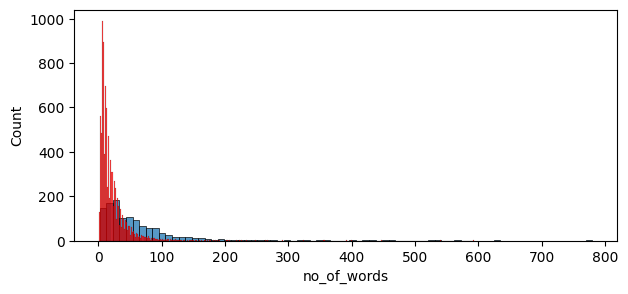

In [ ]:
plt.figure(figsize = (7,3))
sns.histplot(data[data['target'] == 0]['no_of_words'])
sns.histplot(data[data['target'] == 1]['no_of_words'],color = 'red')

It can be seen from here that with target value while negative has more number of words than with positive values.

<Axes: xlabel='count_sentences', ylabel='Count'>

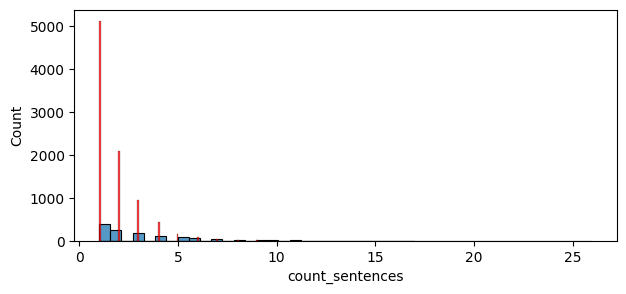

In [ ]:
plt.figure(figsize = (7,3))
sns.histplot(data[data['target'] == 0]['count_sentences'])
sns.histplot(data[data['target'] == 1]['count_sentences'],color = 'red')

It can be seen from here that with target value while negative has more number of sentences than with positive values.

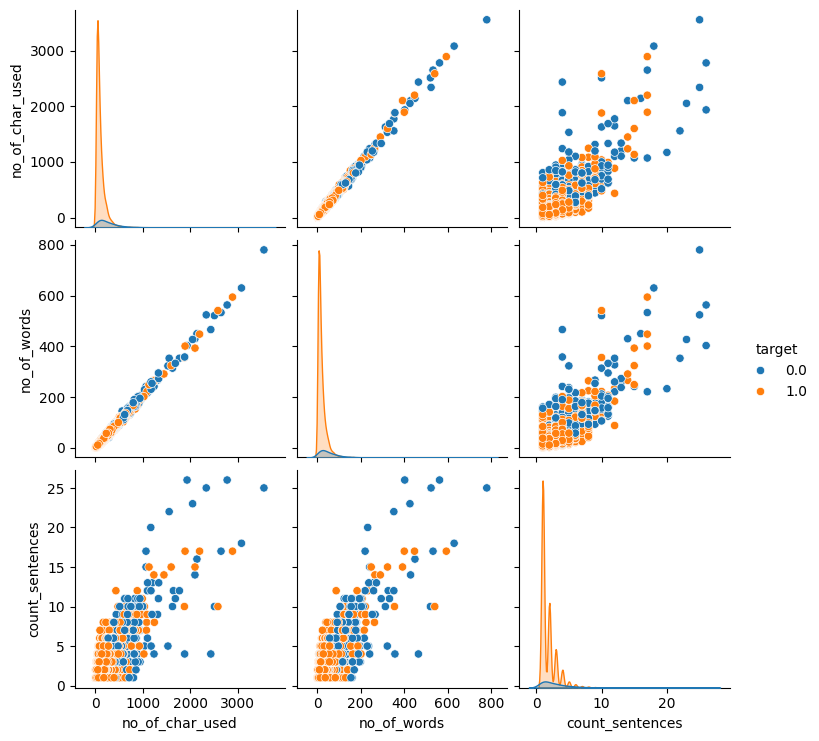

In [ ]:
sns.pairplot(data, hue = 'target')

<ipython-input-241-1f756df288d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

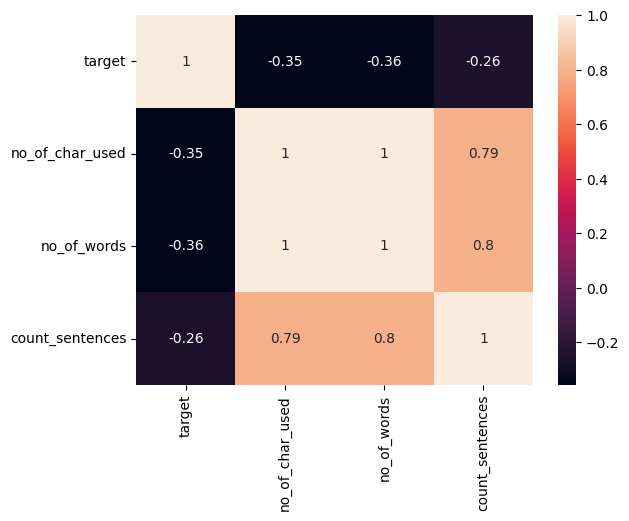

In [ ]:
sns.heatmap(data.corr(), annot = True)

From above we can make out that no_of_characters has high correlation with no_of words and also with count of sentences. Since all three are highly correlated we'll use target column and one among the three columns which are highly correlated. Thus we choose no_of_words column.

# 3. Text preprocessing/Data preprocessing

a) Lower case
b) Tokenisation
c) Removing special characters
d) Removing stop words and punctuations
e) Stemming

In [ ]:
# Lower case
def lower_case(text):
  text.lower()
  return text.lower()

In [ ]:
data['Reviews'] = data['Reviews'].apply(lower_case)

In [ ]:
# Checking if converted into lower case
data['Reviews']

0        tires where delivered to the garage of my choi...
1        easy tyre selection process, competitive prici...
2               very easy to use and good value for money.
3                    really easy and convenient to arrange
4        it was so easy to select tyre sizes and arrang...
                               ...                        
10127    i ordered the wrong tyres, however [redacted] ...
10128    good experience, first time i have used [redac...
10129    i ordered the tyre i needed on line, booked a ...
10130    excellent service from point of order to fitti...
10131    seamless, well managed at both ends. i would r...
Name: Reviews, Length: 10128, dtype: object

In [ ]:
# Tokenisation
def tokenize(text):
  return nltk.word_tokenize(text)

In [ ]:
data['Reviews'] = data['Reviews'].apply(tokenize)

In [ ]:
# To check tokenization
data['Reviews']

0        [tires, where, delivered, to, the, garage, of,...
1        [easy, tyre, selection, process, ,, competitiv...
2        [very, easy, to, use, and, good, value, for, m...
3             [really, easy, and, convenient, to, arrange]
4        [it, was, so, easy, to, select, tyre, sizes, a...
                               ...                        
10127    [i, ordered, the, wrong, tyres, ,, however, [,...
10128    [good, experience, ,, first, time, i, have, us...
10129    [i, ordered, the, tyre, i, needed, on, line, ,...
10130    [excellent, service, from, point, of, order, t...
10131    [seamless, ,, well, managed, at, both, ends, ....
Name: Reviews, Length: 10128, dtype: object

In [ ]:
# Removing special characters
def special_char(text):
  word = []
  for i in text:
    if i.isalnum():
      word.append(i)
  return word

In [ ]:
data['Reviews'] = data['Reviews'].apply(special_char)

In [ ]:
# Check square bracket at index position 10127 have been removed
data['Reviews']

0        [tires, where, delivered, to, the, garage, of,...
1        [easy, tyre, selection, process, competitive, ...
2        [very, easy, to, use, and, good, value, for, m...
3             [really, easy, and, convenient, to, arrange]
4        [it, was, so, easy, to, select, tyre, sizes, a...
                               ...                        
10127    [i, ordered, the, wrong, tyres, however, redac...
10128    [good, experience, first, time, i, have, used,...
10129    [i, ordered, the, tyre, i, needed, on, line, b...
10130    [excellent, service, from, point, of, order, t...
10131    [seamless, well, managed, at, both, ends, i, w...
Name: Reviews, Length: 10128, dtype: object

In [ ]:
# Removing stop words and punctuations
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check all stopwords(work only in sentence formation and not in framing meaning of the sentence)
stp = stopwords.words('english')

In [ ]:
def stop_word_punc(text):
  word = []
  for i in text:
    if i not in stp and i not in string.punctuation:
      word.append(i)
  return word

In [ ]:
data['Reviews'] = data['Reviews'].apply(stop_word_punc)

In [ ]:
# Checking if stop words and punctuations are removed.
data['Reviews']

0        [tires, delivered, garage, choice, garage, not...
1        [easy, tyre, selection, process, competitive, ...
2                          [easy, use, good, value, money]
3                      [really, easy, convenient, arrange]
4        [easy, select, tyre, sizes, arrange, local, fi...
                               ...                        
10127    [ordered, wrong, tyres, however, redacted, arr...
10128    [good, experience, first, time, used, redacted...
10129    [ordered, tyre, needed, line, booked, specifie...
10130    [excellent, service, point, order, fitting, co...
10131    [seamless, well, managed, ends, would, recommend]
Name: Reviews, Length: 10128, dtype: object

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
def stem(text):
  word = []
  for i in text:
    word.append(ps.stem(i))
  return ' '.join(word)

In [ ]:
data['Reviews'] = data['Reviews'].apply(stem)

In [ ]:
data['Reviews']

0        tire deliv garag choic garag notifi deliv day ...
1        easi tyre select process competit price excel ...
2                                 easi use good valu money
3                               realli easi conveni arrang
4        easi select tyre size arrang local fit price c...
                               ...                        
10127    order wrong tyre howev redact arrang collect s...
10128    good experi first time use redact harborn tyre...
10129    order tyre need line book specifi time local g...
10130         excel servic point order fit complaint thank
10131              seamless well manag end would recommend
Name: Reviews, Length: 10128, dtype: object

In [ ]:
# Check wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 600, height = 500)

In [ ]:
# Finding the word cloud for negative reviews i.e. the words that occur most
negative_wc = wc.generate(data[data['target'] == 0]['Reviews'].str.cat(sep =' '))

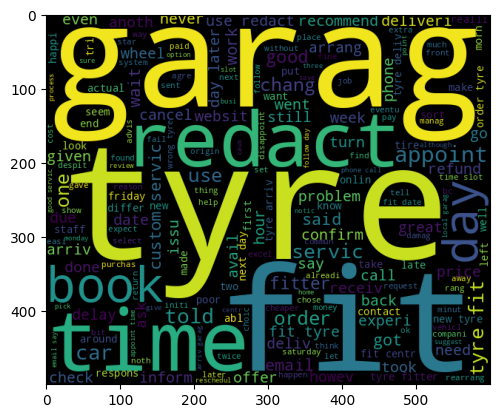

In [ ]:
plt.imshow(negative_wc)

In [ ]:
# # Finding the word cloud for positive reviews i.e. the words that occur most
positive_wc = wc.generate(data[data['target'] == 1]['Reviews'].str.cat(sep =' '))

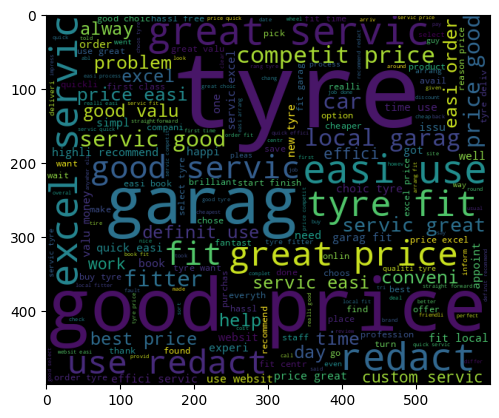

In [ ]:
plt.imshow(positive_wc)

In [ ]:
# Checking the most frequent words in negative reviews.
negative_corpus = []
for review in data[data['target'] == 0]['Reviews'].tolist():
  for word in review.split():
    negative_corpus.append(word)

In [ ]:
# The negative review words
negative_corpus

['book',
 'slot',
 'could',
 'provid',
 'make',
 'bit',
 'mockeri',
 'onlin',
 'book',
 'system',
 'staff',
 'garag',
 'manner',
 'swear',
 'openli',
 'front',
 'custom',
 'wait',
 'garag',
 'hour',
 'get',
 'fit',
 'book',
 'time',
 'slot',
 'avoid',
 'wait',
 'slow',
 'fit',
 '10',
 'found',
 'garag',
 'bit',
 'difficult',
 'find',
 'contact',
 'chang',
 'date',
 'origin',
 'date',
 'chang',
 'redact',
 'item',
 'went',
 'miss',
 'vehicl',
 'time',
 'compani',
 'fit',
 'tyre',
 'miss',
 'appoint',
 'time',
 'told',
 'night',
 'everyth',
 'done',
 'expect',
 'howev',
 'either',
 'fitter',
 'at',
 'local',
 'garag',
 'servic',
 'done',
 'put',
 'finger',
 'mark',
 'inner',
 'roof',
 'line',
 'ca',
 'sure',
 'tyre',
 'ok',
 'balanc',
 'wheel',
 'set',
 'wrong',
 'garag',
 'gone',
 'abroad',
 'stop',
 'germani',
 'set',
 'balanc',
 'possibl',
 'drive',
 'got',
 '4',
 'tyre',
 'cheaper',
 'fit',
 'local',
 'at',
 'week',
 'would',
 'recommend',
 'anyon',
 'redact',
 'say',
 'tin',
 'get',

In [ ]:
# No of negative review words.
len(negative_corpus)

30952

In [ ]:
from collections import Counter
Counter(negative_corpus).most_common(20) # This gives a dictionary of how many times a word has occured in the negative reviews. We have taken 20 words only

[('tyre', 1452),
 ('fit', 951),
 ('garag', 641),
 ('time', 609),
 ('redact', 522),
 ('day', 467),
 ('servic', 396),
 ('book', 372),
 ('would', 308),
 ('appoint', 291),
 ('use', 289),
 ('get', 262),
 ('order', 251),
 ('car', 238),
 ('email', 236),
 ('good', 232),
 ('fitter', 214),
 ('custom', 202),
 ('could', 200),
 ('told', 199)]

In [ ]:
# Making the dataframe out of above dictionary
dataframe = pd.DataFrame(Counter(negative_corpus).most_common(20))
dataframe

,0,1
0,tyre,1452
1,fit,951
2,garag,641
3,time,609
4,redact,522
5,day,467
6,servic,396
7,book,372
8,would,308
9,appoint,291


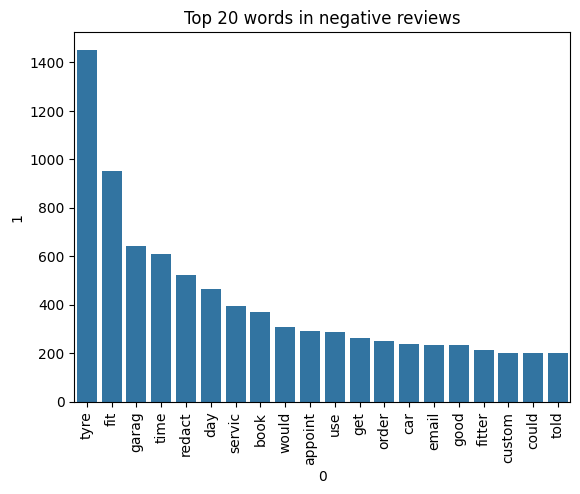

In [ ]:
# Making the bar chart out of above dataframe.
sns.barplot(x = dataframe[0], y = dataframe[1])
plt.xticks(rotation = 'vertical')
plt.title('Top 20 words in negative reviews')
plt.show()

Similarly making it for the positive reviews.

In [ ]:
# Checking the most frequent words in positive reviews.
positive_corpus = []
for review in data[data['target'] == 1]['Reviews'].tolist():
  for word in review.split():
    positive_corpus.append(word)

In [ ]:
# The positive review words
positive_corpus

['tire',
 'deliv',
 'garag',
 'choic',
 'garag',
 'notifi',
 'deliv',
 'day',
 'time',
 'arrang',
 'garag',
 'went',
 'fit',
 'hassel',
 'free',
 'experi',
 'easi',
 'tyre',
 'select',
 'process',
 'competit',
 'price',
 'excel',
 'fit',
 'servic',
 'easi',
 'use',
 'good',
 'valu',
 'money',
 'realli',
 'easi',
 'conveni',
 'arrang',
 'easi',
 'select',
 'tyre',
 'size',
 'arrang',
 'local',
 'fit',
 'price',
 'competit',
 'servic',
 'excel',
 'slight',
 'downsid',
 'know',
 'exact',
 'time',
 'garag',
 'although',
 'garag',
 'quick',
 'delay',
 'user',
 'friendli',
 'websit',
 'competit',
 'price',
 'good',
 'commun',
 'effici',
 'servic',
 'at',
 'euromast',
 'excel',
 'price',
 'servic',
 'straightforward',
 'garag',
 'great',
 'even',
 'known',
 'use',
 'local',
 'garag',
 'easi',
 'use',
 'also',
 'good',
 'price',
 'outstand',
 'valu',
 'money',
 'friendli',
 'profession',
 'servic',
 'great',
 'price',
 'easi',
 'use',
 'good',
 'price',
 'easi',
 'use',
 'garag',
 'familiar',


In [ ]:
# No of positive review words.
len(positive_corpus)

94291

In [ ]:
Counter(positive_corpus).most_common(20) # This gives a dictionary of how many times a word has occured in the positive reviews. We have taken 20 words only

[('tyre', 4670),
 ('servic', 4257),
 ('price', 3658),
 ('good', 3198),
 ('fit', 3076),
 ('easi', 2635),
 ('use', 2591),
 ('great', 2340),
 ('garag', 1837),
 ('excel', 1615),
 ('time', 1538),
 ('redact', 1488),
 ('order', 1001),
 ('local', 943),
 ('recommend', 846),
 ('quick', 750),
 ('would', 706),
 ('choic', 697),
 ('effici', 676),
 ('book', 651)]

In [ ]:
# Making the dataframe_pos out of above dictionary
dataframe_pos = pd.DataFrame(Counter(positive_corpus).most_common(20))
dataframe_pos

,0,1
0,tyre,4670
1,servic,4257
2,price,3658
3,good,3198
4,fit,3076
5,easi,2635
6,use,2591
7,great,2340
8,garag,1837
9,excel,1615


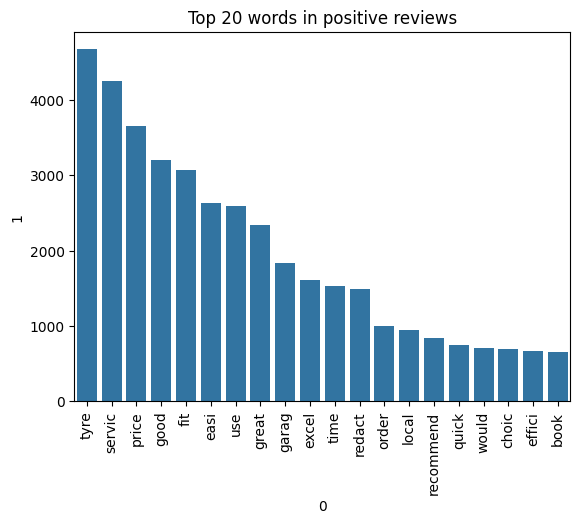

In [ ]:
# Making the bar chart out of above dataframe_pos.
sns.barplot(x = dataframe_pos[0], y = dataframe_pos[1])
plt.xticks(rotation = 'vertical')
plt.title('Top 20 words in positive reviews')
plt.show()

# 4. Model Building

a) Vectorize the review column b) Use ML model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(data['Reviews']).toarray()

In [ ]:
X.shape # Gives 10128 reviews and 4784 words.

(10128, 4807)

In [ ]:
y = data['target'].values

In [ ]:
y

array([1., 1., 1., ..., 1., 1., 1.])

Now, we'll apply train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# We'll be using SVM algorithm to train and test our data.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
# Create an SVM classifier
svm_classifier = SVC()

In [ ]:
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [ ]:
# Evaluate the performance
accuracy = (accuracy_score(y_test, y_pred))*100
precision = (precision_score(y_test, y_pred))*100
confu_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f'Precision: {precision}')

Accuracy: 93.58
Precision: 94.71413160733549


Since we are getting an accuracy of 93.58% we will use use hyperparameters to tune the values so that accuracy score is increased.

Text(0.5, 1.0, 'Confusion Matrix')

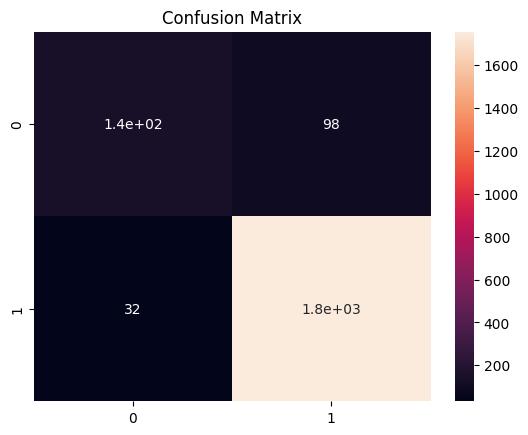

In [ ]:
sns.heatmap(confu_matrix, annot = True)
plt.title('Confusion Matrix')

In [ ]:
# Importing Randomizedsearch cv to hypertune parameters.
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Hyperparametric tuning
estimator = SVC()
param_rand = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto']}
rand_search = RandomizedSearchCV(estimator, param_rand, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [ ]:
# fitting the model for randomized search
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   scoring='accuracy')

In [ ]:
print(rand_search.best_params_)

{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


In [ ]:
# training with best hyperparameters as we got in previous result just above
better_svm = SVC(C = 0.1, kernel = 'linear', gamma = 'scale')
better_svm.fit(X_train, y_train)
y_pred_svm = better_svm.predict(X_test) # Predicting model using SVM Algorithm.

In [ ]:
# calculating accuracy
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print('Test accuracy: ', accuracy_svm*100)

Test accuracy:  92.79368213228035


In [ ]:
# calculating Precision
precision_svm = precision_score(y_test,y_pred_svm)
print('Test Precision: ', precision_svm*100)

Test Precision:  93.53128313891834


Conclusion: The model finally can predict 92.79% times the correct accuracy of reviews. While 5.81% times the model is unable to predict. We have achieved a better precision with high accuracy thus model can be used for future aspirations. Although accuracy is higher, a more better hypertuning using gridsearch_cv may further increase the accuracy.